In [26]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [27]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [28]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [31]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalization

In [32]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## CNN Model creation

In [33]:
# Used Batch Norm & Dropout methods to reduce overfitting

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.2904 - accuracy: 0.5774 - val_loss: 0.6865 - val_accuracy: 0.5510
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.6133 - accuracy: 0.6706 - val_loss: 0.6015 - val_accuracy: 0.6732
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5966 - accuracy: 0.6943 - val_loss: 0.6487 - val_accuracy: 0.6310
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5562 - accuracy: 0.7254 - val_loss: 0.6592 - val_accuracy: 0.6386
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5369 - accuracy: 0.7429 - val_loss: 0.5584 - val_accuracy: 0.7254
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5186 - accuracy: 0.7591 - val_loss: 0.5090 - val_accuracy: 0.7720
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4840 - accuracy: 0.7778 - val_loss: 0.6503 - val_ac

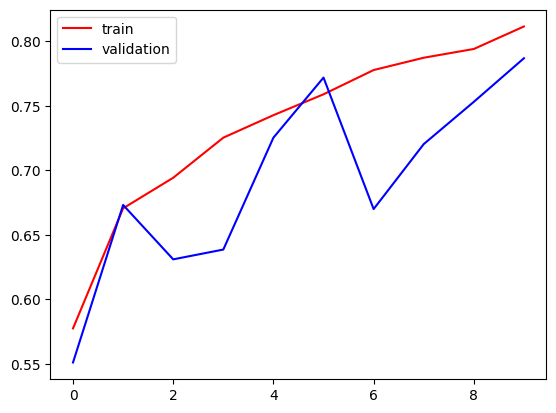

In [37]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

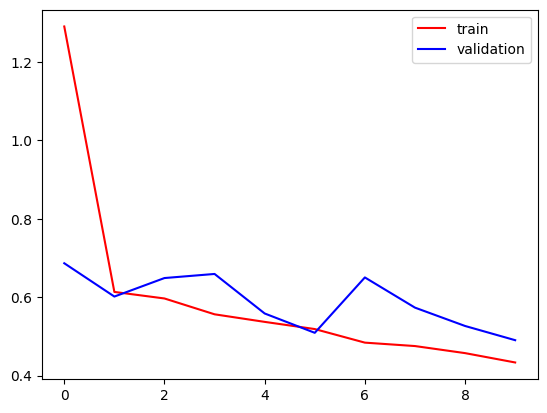

In [38]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### Predicted result on outside data

In [39]:
# Cat
import cv2

In [40]:
test_img = cv2.imread('/content/cat.jpg')

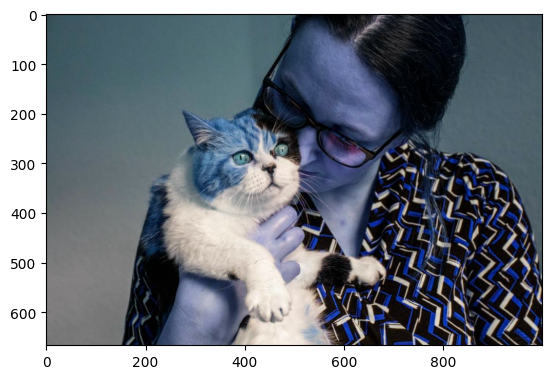

In [41]:
plt.imshow(test_img)

In [42]:
test_img.shape

(667, 1000, 3)

In [43]:
test_img = cv2.resize(test_img,(256,256))

In [44]:
test_input = test_img.reshape((1,256,256,3))

In [45]:
model.predict(test_input)

1/1 [==============================] - 0s 190ms/step


array([[0.19420858]], dtype=float32)

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)

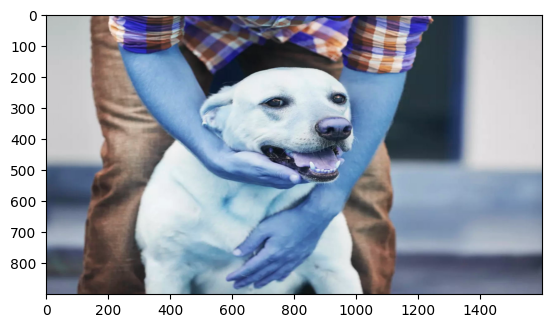

In [46]:
# Dog
import cv2
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)